In [1]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:

model = api.load("word2vec-google-news-300")

print("Model Loaded Successfully")


Model Loaded Successfully


In [3]:
similar_words = model.most_similar("king", topn=5)

print("Words similar to 'king':")
for word, score in similar_words:
    print(word, "->", round(score, 3))


Words similar to 'king':
kings -> 0.714
queen -> 0.651
monarch -> 0.641
crown_prince -> 0.62
prince -> 0.616


In [4]:
result = model.most_similar(
    positive=["king", "woman"],
    negative=["man"],
    topn=1
)

print("king - man + woman = ", result[0][0])


king - man + woman =  queen


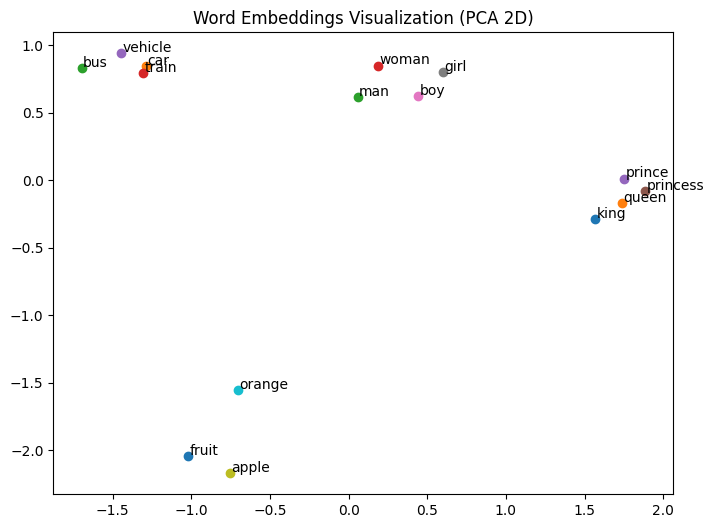

In [5]:
words = [
    "king", "queen", "man", "woman",
    "prince", "princess", "boy", "girl",
    "apple", "orange", "fruit",
    "car", "bus", "train", "vehicle"
]

# Get word vectors
word_vectors = [model[word] for word in words]

# Apply PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(8,6))

for i, word in enumerate(words):
    x = reduced[i][0]
    y = reduced[i][1]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, word)

plt.title("Word Embeddings Visualization (PCA 2D)")
plt.show()
